<a href="https://colab.research.google.com/github/arqamrp/takneek/blob/main/Food_Sharing_NoTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day0:
569 855 773


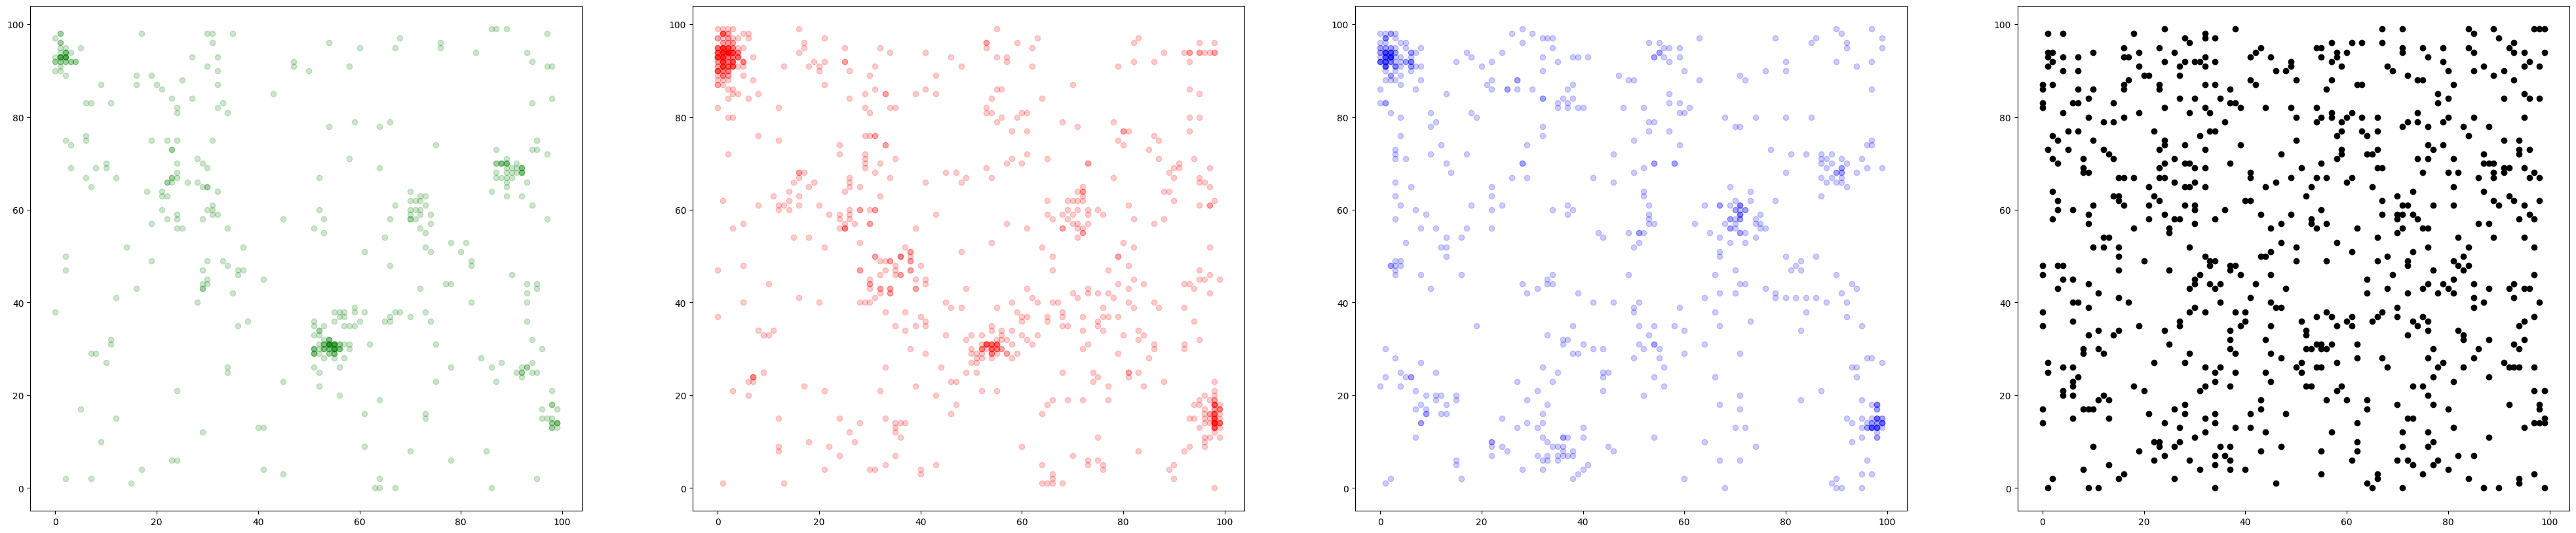

Day1:
423 795 607
Day2:
568 1284 1020


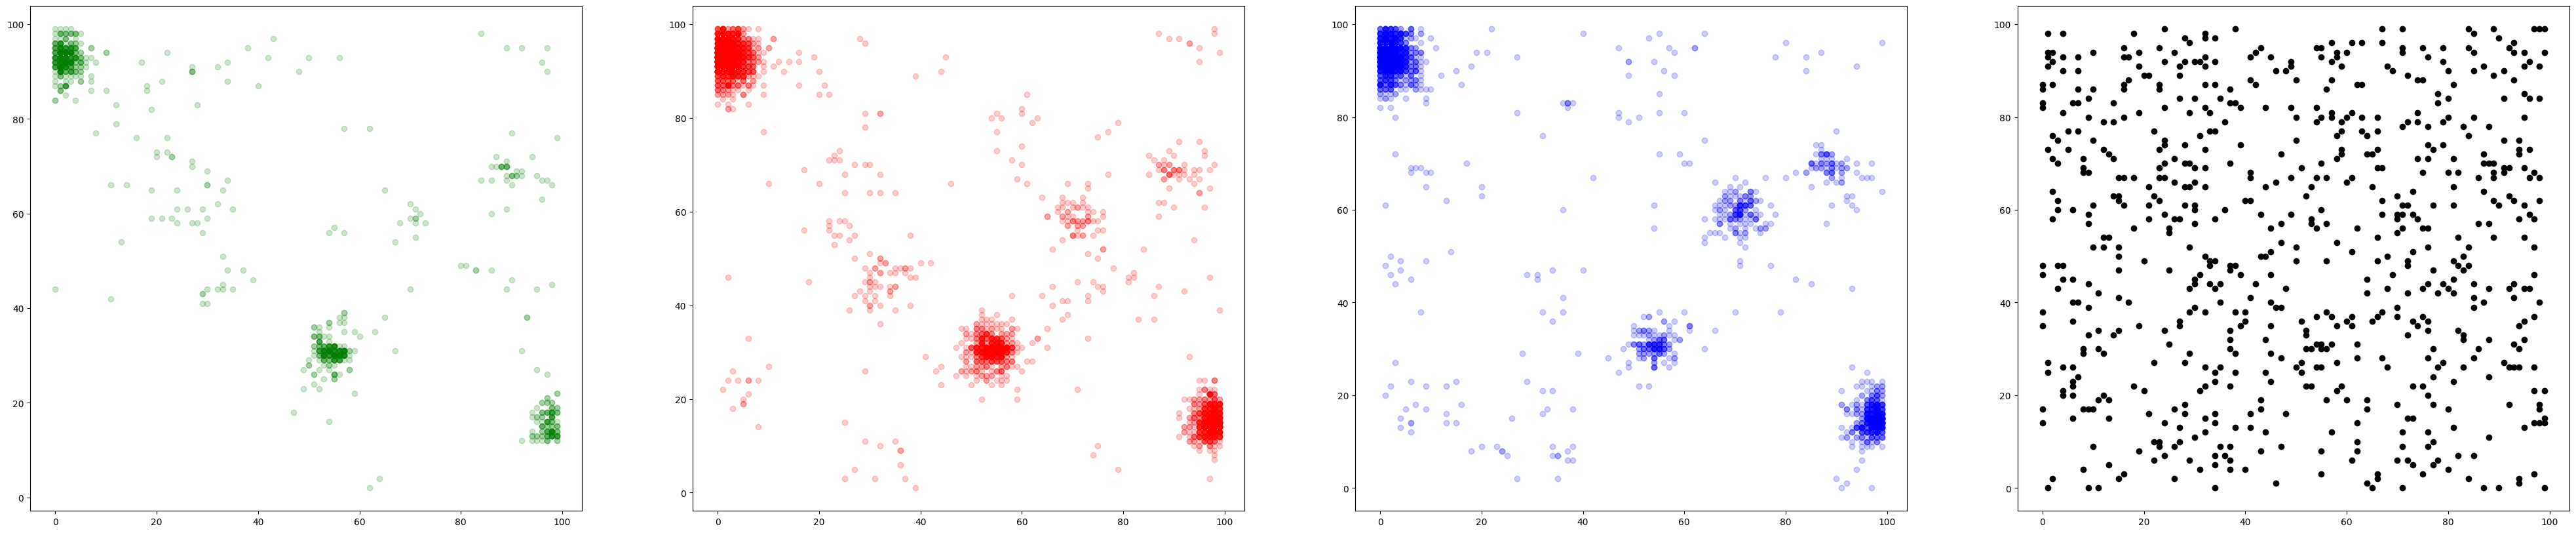

Day3:
925 3534 2966
Day4:
1941 10319 8361


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt


class Macpan:
    def __init__(self, macpan_type):
        self.food = 15
        self.type = macpan_type
        self.x = 0
        self.y = 0
        self.directional_food_prob = [0, 0, 0, 0]
        self.history_path = [[0, 0], [0, 0]]
        self.previous_food_avg = 15
        self.intelligence = random.choices([0, 1], k=1)
        self.food_history = [15, 15]
        # here up is index 0 , right is index is 1, down is index is 2 , left is index 3
        if macpan_type == 3:
            self.history = 0  # has not been helped yet, so it will act as ungrateful


class Grid:
    def __init__(self, GRID_SIZE=100, NUM_CANTEENS=700, NUM_DAYS=25, GHOST_ATTACK=20, CANTEEN_FOOD=10,
                 REPRO_THRESHOLD=30, EXCESS_THRESHOLD=20, MAX_POPULATION=60000):
        self.GRID_SIZE = GRID_SIZE
        self.NUM_CANTEENS = NUM_CANTEENS
        self.NUM_DAYS = NUM_DAYS
        self.GHOST_ATTACK = GHOST_ATTACK
        self.CANTEEN_FOOD = CANTEEN_FOOD
        self.REPRO_THRESHOLD = REPRO_THRESHOLD
        self.EXCESS_THRESHOLD = GHOST_ATTACK
        self.MAX_POPULATION = MAX_POPULATION
        self.grid_canteen = np.zeros((GRID_SIZE, GRID_SIZE))
        self.grid_object = [[[] for j in range(GRID_SIZE)] for i in range(GRID_SIZE)]
        self.num_helpful_macpan = 0
        self.num_ungrateful_macpan = 0
        self.num_tit_for_tat_macpan = 0
        self.num_canteens_placed = 0
        self.num_macpan = 0
        self.num_macpan_died = 0
        self.num_macpan_reproduced = 0

    def place_macpan(self, macpan):
        x, y = random.randint(0, self.GRID_SIZE - 1), random.randint(0, self.GRID_SIZE - 1)
        self.grid_object[x][y].append(macpan)
        macpan.x = x
        macpan.y = y
        if macpan.type == 1:
            self.num_helpful_macpan += 1
        elif macpan.type == 2:
            self.num_ungrateful_macpan += 1
        elif macpan.type == 3:
            self.num_tit_for_tat_macpan += 1
            self.num_macpan += 1

    def place_canteens(self):
        for i in range(self.NUM_CANTEENS):
            x, y = random.randint(0, self.GRID_SIZE - 1), random.randint(0, self.GRID_SIZE - 1)
            self.grid_canteen[x][y] = 1
            self.num_canteens_placed += 1

    def ghost_attack(self, Macpan_List):
        for macpan in list(Macpan_List):
            macpan.food -= self.GHOST_ATTACK
            if macpan.food <= 0:
                self.num_macpan -= 1
                if macpan.type == 1:
                    self.num_helpful_macpan -= 1
                elif macpan.type == 2:
                    self.num_ungrateful_macpan -= 1
                elif macpan.type == 3:
                    self.num_tit_for_tat_macpan -= 1
                try:
                    self.grid_object[macpan.x][macpan.y].remove(macpan)
                except:
                    pass
                Macpan_List.remove(macpan)

    def movement_intel_food(self, macpan):
        self.grid_object[macpan.x][macpan.y].remove(macpan)
        macpan.food_history[-1] = macpan.food
        prob = macpan.directional_food_prob
        prob_max = max(macpan.directional_food_prob)
        prob_min = min(macpan.directional_food_prob)
        absolute_max = max(abs(prob_max), abs(prob_min))

        if absolute_max == 0:
            absolute_max = 1
        for i in range(4):
            prob[i] = prob[i] / absolute_max
            prob[i] = 1 / (1 + np.exp(-prob[i]))

        dx, dy = random.choices([(0, 1), (1, 0), (0, -1), (-1, 0)], weights=prob, k=1)[0]
        newx = macpan.x + dx
        newy = macpan.y + dy

        if newx < 0 or newy > 99 or newx > 99 or newy < 0:
            newx = macpan.x - dx
            newy = macpan.y - dy
        dx = macpan.history_path[-1][0] - macpan.history_path[-2][0]
        dy = macpan.history_path[-1][1] - macpan.history_path[-2][1]
        macpan.x = newx
        macpan.y = newy
        if dx == 0 and dy == 1:
            macpan.directional_food_prob[0] += (macpan.food_history[-1] - macpan.food_history[-2])
        elif dx == 1 and dy == 0:
            macpan.directional_food_prob[1] += (macpan.food_history[-1] - macpan.food_history[-2])
        elif dx == 0 and dy == -1:
            macpan.directional_food_prob[2] += (macpan.food_history[-1] - macpan.food_history[-2])
        else:
            macpan.directional_food_prob[3] += (macpan.food_history[-1] - macpan.food_history[-2])
        self.grid_object[macpan.x][macpan.y].append(macpan)
        macpan.food_history[-2] = macpan.food_history[-1]
        macpan.history_path[-1][0] = macpan.x
        macpan.history_path[-1][1] = macpan.y

    def reproduce(self, macpan):
        macpan.food /= 2
        self.num_macpan_reproduced += 1
        newmac = Macpan(macpan.type)
        newmac.food = macpan.food
        return newmac

    def canteen(self, macpan):
        if self.grid_canteen[macpan.x][macpan.y] == 1:
            macpan.food += self.CANTEEN_FOOD

    def sharing_grid(self):
        for i in range(self.GRID_SIZE):
            for j in range(self.GRID_SIZE):
                self.grid_object[i][j].sort(key=lambda x: x.food)
                it = 0
                ig = 0
                if len(self.grid_object[i][j]) == 0:
                    continue
                if self.grid_object[i][j][-1].food <= self.EXCESS_THRESHOLD:
                    continue
                while (self.grid_object[i][j][it].food < self.EXCESS_THRESHOLD):
                    it += 1
                it -= 1
                while (self.grid_object[i][j][ig].food <= self.EXCESS_THRESHOLD):
                    ig += 1
                while (it != -1 and ig < len(self.grid_object[i][j])):
                    u = self.grid_object[i][j][it]
                    v = self.grid_object[i][j][ig]

                    t = min(self.EXCESS_THRESHOLD - u.food, v.food - self.EXCESS_THRESHOLD)

                    if v.type == 1:
                        u.food += t
                        v.food -= t
                        if u.type == 3:
                            u.history += t
                    elif v.type == 3 and v.history > 0:
                        u.food += t
                        v.food -= t
                        if u.type == 3:
                            u.history += t
                        v.history -= t

                    elif v.type == 2:
                        ig += 1
                    if (u.food == self.EXCESS_THRESHOLD):
                        it -= 1
                    if (v.food == self.EXCESS_THRESHOLD):
                        ig += 1

                    if not (v.type == 3 and v.history > 0):
                        ig += 1


Plt_No_Helpful = []
Plt_No_Ungrateful = []
Plt_No_Tit = []
square = Grid()
Macpens_List = [None] * 3000

for i in range(3000):
    mac = Macpan(i % 3 + 1)
    square.place_macpan(mac)
    Macpens_List[i] = mac
square.place_canteens()
flag = 1
for day in range(square.NUM_DAYS):
    for hour in range(24):
        if len(Macpens_List) > square.MAX_POPULATION:
            flag = 0
            break
        for blob in Macpens_List:
            square.movement_intel_food(blob)
            square.canteen(blob)
            if blob.food >= square.REPRO_THRESHOLD:
                mac = square.reproduce(blob)
                square.place_macpan(mac)
                square.grid_object[mac.x][mac.y].remove(mac)
                mac.x = blob.x
                mac.y = blob.y
                square.grid_object[mac.x][mac.y].append(mac)
                Macpens_List.append(mac)
        square.sharing_grid()
    square.ghost_attack(Macpens_List)   
    if flag == 0:
        print(square.num_helpful_macpan, square.num_ungrateful_macpan, square.num_tit_for_tat_macpan)
        break
    if((day+1)%2==0):
        helpful_x = []
        unhelpful_x = []
        tit_tat_x = []
        helpful_y = []
        unhelpful_y = []
        tit_tat_y = []
        canteen_x = []
        canteen_y = []
        for x in range(square.GRID_SIZE):
            for y in range(square.GRID_SIZE):
                if square.grid_canteen[x][y] == 1:
                    canteen_x.append(x)
                    canteen_y.append(y)
        for blob in Macpens_List:
            if (blob.type == 1):
                helpful_x.append(blob.x)
                helpful_y.append(blob.y)
            elif (blob.type == 2):
                unhelpful_x.append(blob.x)
                unhelpful_y.append(blob.y)
            else:
                tit_tat_x.append(blob.x)
                tit_tat_y.append(blob.y)
        f = plt.figure(figsize=(50, 10))
        ax1 = f.add_subplot(141)
        ax2 = f.add_subplot(142)
        ax3 = f.add_subplot(143)
        ax4 = f.add_subplot(144)
        ax1.scatter(helpful_x, helpful_y, color='green', alpha=0.2)
        ax2.scatter(unhelpful_x, unhelpful_y, color='red', alpha=0.2)
        ax3.scatter(tit_tat_x, tit_tat_y, color='blue', alpha=0.2)
        ax4.scatter(canteen_x, canteen_y, color='black')
        plt.show()

    print(f"Day{day}:")
    Plt_No_Helpful.append(square.num_helpful_macpan)
    Plt_No_Ungrateful.append(square.num_ungrateful_macpan)
    Plt_No_Tit.append(square.num_tit_for_tat_macpan)
    print(square.num_helpful_macpan, square.num_ungrateful_macpan, square.num_tit_for_tat_macpan)


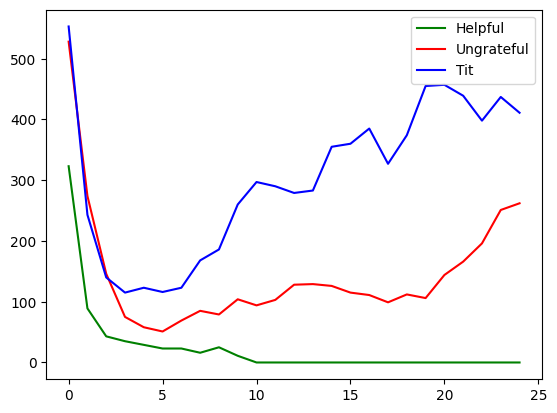

In [ ]:
plt.plot(Plt_No_Helpful, color='green')
plt.plot(Plt_No_Ungrateful, color='red')
plt.plot(Plt_No_Tit, color='blue')
plt.legend(["Helpful", "Ungrateful", "Tit"])
plt.xlabel = 'days'
plt.ylabel = 'Population_Number'